In [1]:
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *
from sklearn.preprocessing import OneHotEncoder
from utils import *
from VAE import *

In [2]:
X_train, y_train = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                                   labels_path='train-labels-idx1-ubyte')

X_train = X_train[:10000]
X_train = np.where(X_train > 127, 1, 0)

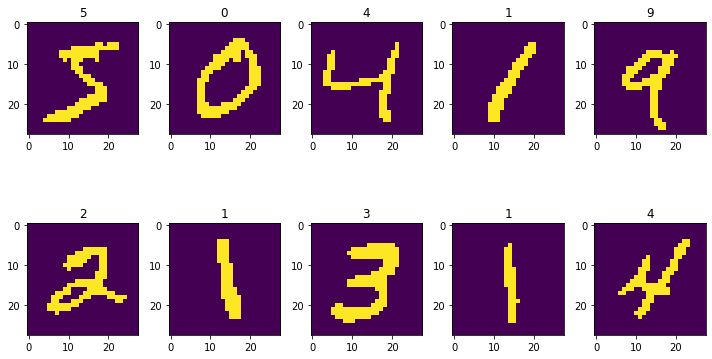

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(10,6))
ax = ax.ravel()
for i in range(10):
  ax[i].imshow(X_train[i].reshape(28, 28))
  ax[i].set_title(y_train[i])
fig.tight_layout()

Epoch 1 out of 100, loss: 0.03070585939476758
Epoch 20 out of 100, loss: 0.008600594149295848
Epoch 40 out of 100, loss: 0.005327828564722663
Epoch 60 out of 100, loss: 0.0040985747423832415
Epoch 80 out of 100, loss: 0.00339349431698434
Epoch 100 out of 100, loss: 0.0029294436214803168


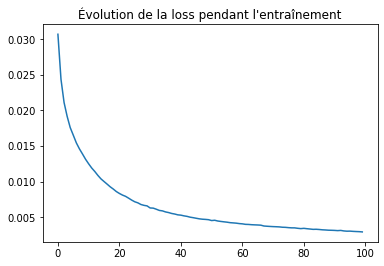

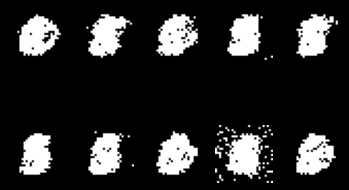

In [20]:
# Valeurs des hyper paramètres et entrainement
p = 784  # (égal à 28 * 28, la taille de l'image)
q = 600
rbm = RBM(p, q) # la taille du réseau est donc 784 * 600 = 470 400

epochs = 100
learning_rate = 0.01
batch_size = 32

RBM_trained, loss = rbm.train_RBM(X_train, epochs, learning_rate, batch_size, verbose=True)

plt.plot(loss)
plt.title("Évolution de la loss pendant l'entraînement")
plt.show()

n_iter = 1000
n_imgs = 10
RBM_trained.generer_image_RBM(n_imgs, n_iter, dataset='mnist')

Epoch 1 out of 100, loss: 0.05291837418534426
Epoch 20 out of 100, loss: 0.018079691347625302
Epoch 40 out of 100, loss: 0.01384871637619602
Epoch 60 out of 100, loss: 0.011686432096410487
Epoch 80 out of 100, loss: 0.010341377450871244
Epoch 100 out of 100, loss: 0.00940828219839884
Epoch 1 out of 100, loss: 0.12351409497027402
Epoch 20 out of 100, loss: 0.05167571735283806
Epoch 40 out of 100, loss: 0.04294183830516605
Epoch 60 out of 100, loss: 0.03914347934437328
Epoch 80 out of 100, loss: 0.03681789145400625
Epoch 100 out of 100, loss: 0.035125703429728664
Epoch 1 out of 100, loss: 0.14989346048871457
Epoch 20 out of 100, loss: 0.07382002237304328
Epoch 40 out of 100, loss: 0.06675461723942387
Epoch 60 out of 100, loss: 0.06391859268968399
Epoch 80 out of 100, loss: 0.062453518948094734
Epoch 100 out of 100, loss: 0.06154113571304922


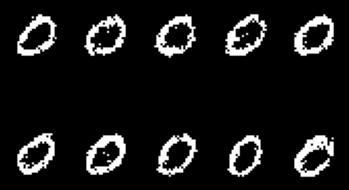

In [4]:
neurons = [X_train[0].shape[0], 400, 300, 100] 
# taille du réseau: 784 * 400 + 400 * 300 + 300 * 100 = 463 600
dbn = DBN(neurons)
dbn, losses = dbn.pretrain_DBN(X_train, n_epoch=100, lr_rate=0.001)
n_iter = 1000
n_imgs = 10
generated = dbn.generer_image_DBN(n_imgs, n_iter=n_iter, dataset='mnist')

In [ ]:
# build model
vae = VAE(x_dim=784, h_dim1=256, h_dim2=128, z_dim=2)
# taille du modèle: Partie encodeur -> 784 * 256 + 256 * 128 + 128 * 2 * 2  
#                   Partie décodeur -> 2 * 128 + 128 * 256 + 256 * 784
# taille totale: 476 584
#
if torch.cuda.is_available():
    vae.cuda()

optimizer = optim.Adam(vae.parameters(), lr=1e-3)
train_loader = array_to_dataloader(X_train)

for epoch in range(1, 51):
    train(vae, train_loader, optimizer, epoch)

Train Epoch: 1 [0/10000 (0%)]	Loss: 544.024109
Train Epoch: 1 [1000/10000 (10%)]	Loss: 184.606339
Train Epoch: 1 [2000/10000 (20%)]	Loss: 201.236130
Train Epoch: 1 [3000/10000 (30%)]	Loss: 207.187180
Train Epoch: 1 [4000/10000 (40%)]	Loss: 166.892670
Train Epoch: 1 [5000/10000 (50%)]	Loss: 211.530548
Train Epoch: 1 [6000/10000 (60%)]	Loss: 158.499100
Train Epoch: 1 [7000/10000 (70%)]	Loss: 147.805893
Train Epoch: 1 [8000/10000 (80%)]	Loss: 152.217819
Train Epoch: 1 [9000/10000 (90%)]	Loss: 248.510452
====> Epoch: 1 Average loss: 169.4443
Train Epoch: 2 [0/10000 (0%)]	Loss: 214.269531
Train Epoch: 2 [1000/10000 (10%)]	Loss: 217.233154
Train Epoch: 2 [2000/10000 (20%)]	Loss: 254.105865
Train Epoch: 2 [3000/10000 (30%)]	Loss: 211.508835
Train Epoch: 2 [4000/10000 (40%)]	Loss: 122.954155
Train Epoch: 2 [5000/10000 (50%)]	Loss: 195.457031
Train Epoch: 2 [6000/10000 (60%)]	Loss: 131.237747
Train Epoch: 2 [7000/10000 (70%)]	Loss: 153.167664
Train Epoch: 2 [8000/10000 (80%)]	Loss: 153.363831
T

In [ ]:
for i in range(n_imgs):
    with torch.no_grad():
        if torch.cuda.is_available():
            z = torch.randn(64, 2).cuda()
            sample = vae.decoder(z).cuda()
        else:
            z = torch.randn(64, 2)
            sample = vae.decoder(z)
        sample.view(64, 1, 28, 28)
        plt.subplot(n_imgs // 5, 5, i + 1)
        plt.imshow(data.reshape(20, 16), cmap='gray')
        plt.axis('off')
plt.show()